In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree



In [4]:
df = pd.read_csv('dataset_clean.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [5]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)

In [6]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1069, 6)
Test set: (268, 6)


In [7]:
# Séparation des colonnes numériques et catégorielles
num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]

In [8]:
# Création de pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

In [9]:
# Création d'un Préprocessor pour appliquer les pipelines crées pour les transfomations sur les colonnes
preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing)

In [10]:
# Modèle d'Arbre de Regression Decisionnel


decision_tree = DecisionTreeRegressor()
pipe_dt = make_pipeline(preprocessing, decision_tree)

pipe_dt.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('pipeline-1',
                                                     Pipeline(steps=[('standardscaler',
                                                                      StandardScaler())]),
                                                     ['age', 'bmi', 'children']),
                                                    ('pipeline-2',
                                                     Pipeline(steps=[('onehotencoder',
                                                                      OneHotEncoder())]),
                                                     ['sex', 'smoker',
                                                      'region'])]))])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('pipeline-1',
                

In [11]:
param_grid = {'decisiontreeregressor__max_depth': [5],
                'decisiontreeregressor__min_samples_leaf': [20],
                'decisiontreeregressor__min_samples_split': [2]
}

dtr = GridSearchCV(pipe_dt, param_grid, cv=5, scoring="r2", return_train_score=True)

dtr.fit(X_train, y_train)
              

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('standardscaler',
                                                                                                           StandardScaler())]),
                                                                                          ['age',
                                                                                           'bmi',
                                                                                           'children']),
                                                                                         ('pipeline-2',
                                                                                          Pipeline(steps=[('onehotencoder',
                                                                                                           OneHotEncoder())]),
                                                                                          ['sex',
                                                                                           'smoker',
                                                                                           'region'])]))])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [5],
                         'decisiontreeregressor__min_samples_leaf': [20],
                         'decisiontreeregressor__min_samples_split': [2]},
             return_train_score=True, scoring='r2')

In [12]:
dtr.best_params_

{'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__min_samples_leaf': 20,
 'decisiontreeregressor__min_samples_split': 2}

In [13]:
dtr.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['sex',
                                                                    'smoker',
                                                                    'region'])]))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=20))])

In [14]:
dtr.best_score_

0.8311909706274735

In [15]:
# evaluate the model on the test set
print(f"Best validation score = {(dtr.best_score_)*100:.2f}")
print(f"Best hyperparameters = {dtr.best_params_}")
print(f"Test performance = {(dtr.score(X_test, y_test))*100:.2f}")


Best validation score = 83.12
Best hyperparameters = {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 20, 'decisiontreeregressor__min_samples_split': 2}
Test performance = 90.09


In [16]:
arbre = tree.DecisionTreeClassifier(random_state=0)

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

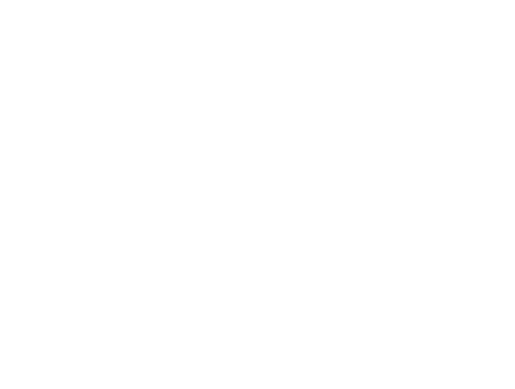

In [19]:
arbre = arbre.fit(X , y)
tree.plot_tree(arbre)